In [42]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
def preprocess_image(image_path_or_url, target_size=1024, normalize=True):
    """
    将图像预处理为 1×1×target_size×target_size 的张量
    
    Args:
        image_path: 图像路径
        target_size: 目标尺寸 (默认512)
        normalize: 是否归一化到[0,1]范围
    
    Returns:
        torch.Tensor
    """
    try:
         
            # 从本地文件加载
        img = Image.open(image_path_or_url)
        
        # 转换为RGB模式（去除透明通道）
        if img.mode != 'RGB':
            img = img.convert('RGB')
        
        print(f"原始图像尺寸: {img.size}")
        
        # 定义预处理变换
        transform = transforms.Compose([
            transforms.Resize((target_size, target_size),interpolation=transforms.InterpolationMode.NEAREST),  # 调整尺寸
            transforms.Grayscale(num_output_channels=1),    # 转为灰度图
            transforms.ToTensor(),                          # 转为张量并归一化到[0,1]
        ])
        
        # 应用变换
        img_tensor = transform(img)
        
        # 添加batch维度: (1, 64, 64) -> (1, 1, 64, 64)
        img_tensor = img_tensor.unsqueeze(0)
        
        #print(f"处理后张量形状: {img_tensor.shape}")
        #print(f"张量数值范围: [{img_tensor.min():.3f}, {img_tensor.max():.3f}]")
        
        return img_tensor
        
    except Exception as e:
        print(f"图像处理出错: {e}")
        return None

def crop(tensor):
    size=tensor.size()[2]
    hori=(1080-size)//2
    verti=(1080-size)//2
    tensor=F.pad(tensor,[hori,hori,verti,verti])
    print(tensor.size())
    return tensor

def show_image_tensor(tensor, title="Image"):
    """输入一个张量，输出其对应的图像，进行可视化"""
    if tensor.dim() == 4:
        img = tensor.squeeze(0).squeeze(0).cpu().detach().numpy()
    elif tensor.dim() == 3:
        img = tensor.squeeze(0).cpu().detach().numpy()
    else:
        img = tensor.cpu().detach().numpy()
    
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray')
    plt.title(title)
    #plt.colorbar()
    plt.show()

原始图像尺寸: (512, 512)
原始图像尺寸: (512, 512)
torch.Size([1, 1, 1080, 1080])


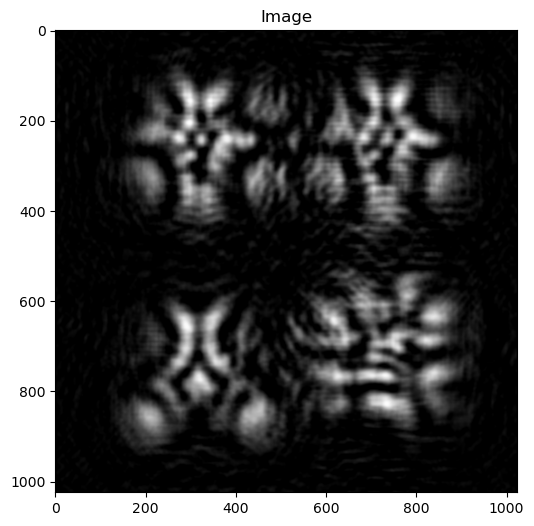

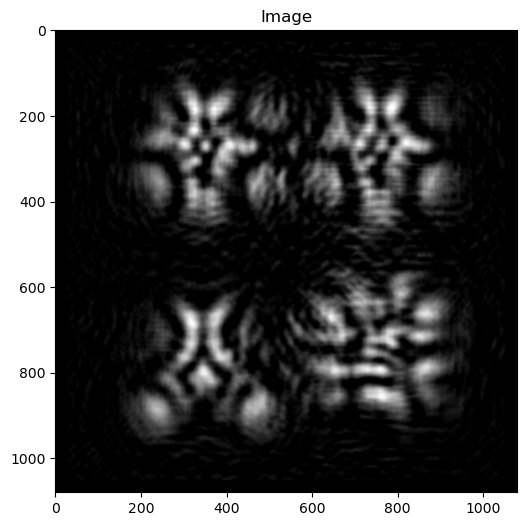

In [43]:
import torchvision
#aper_path这里输入光阑图片的地址，一般保存在results里面
aper_path="../results/results_20250718_154850/aperture.png"
img1=preprocess_image(aper_path,512)
img2=preprocess_image(aper_path,1024)
img3=crop(img2)
show_image_tensor(img2)
show_image_tensor(img3)
torchvision.utils.save_image(img3,"aper1080.png")

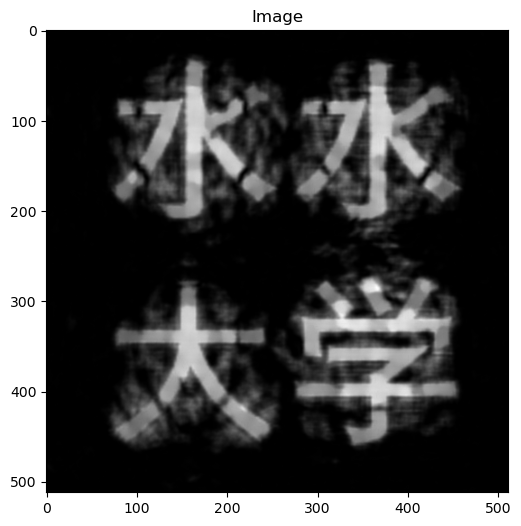

In [49]:
#验证
from Fresnal import Fresnal#振幅
from Fresnal_extra import Fresnal_ex#相位
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
fre=Fresnal(512,lambda_=632e-9,d=0.6,rate=16e-6)
dif1=fre(img1.to(DEVICE))
show_image_tensor(dif1)